# Loan Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

## Load Dataset

In [3]:
# load dataset
df = pd.read_csv('loan_train.csv')

In [3]:
#Checking first few rows
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
#Get information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## Data Cleaning

In [5]:
#Checking missing values
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [6]:
#Checking the percentage of the missing data
df.isnull().sum() * 100 / len(df)

Gender                2.117264
Married               0.488599
Dependents            2.442997
Education             0.000000
Self_Employed         5.211726
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           0.000000
Term                  2.280130
Credit_History        8.143322
Area                  0.000000
Status                0.000000
dtype: float64

The **percentage** of the missing data **is not a lot**, there are **only several missing values** in various columns. Rather than tampering the dataset by filling in the missing data, I decided to **remove/drop the missing data.**

In [7]:
#Dropping the missing data
df = df.dropna()
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

## One Hot Encoding untuk Data Kategorial

In [8]:
df_dc = pd.get_dummies(df)
df_dc.head()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Area_Rural,Area_Semiurban,Area_Urban,Status_N,Status_Y
0,584900,0.0,15000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,458300,150800.0,12800000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,300000,0.0,6600000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,258300,235800.0,12000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,600000,0.0,14100000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1


In [4]:
df["Loan_Amount"].max()

70000000

In [5]:
df["Loan_Amount"].min()

0

## Prediction Model

### Multivariate Regression

In [45]:
# Defining our input and output variables
y = df_dc["Loan_Amount"]
x = df_dc.drop(["Loan_Amount"], axis = 1)

In [46]:
# Split dataset into 2 groups in random
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state = 1)

In [47]:
#Train dataset
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [48]:
#Skor untuk mewakili data latih
lr.score(x_train, y_train)

0.7579917915616421

In [49]:
#Skor untuk cakupan data uji
lr.score(x_test, y_test)

-0.9569656660072166

In [50]:
from sklearn.metrics import mean_absolute_error

#Mean absolute error untuk data test
mean_absolute_error(y_test, y_pred)

5607739.279099908

In [51]:
#Mean absolute error untuk data latih
mean_absolute_error(y_train, lr.predict(x_train))

2882212.0551613974

In [27]:
#Data to predict
x_data = x_test[-1:]
x_data

,Applicant_Income,Coapplicant_Income,Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Area_Rural,Area_Semiurban,Area_Urban,Status_N,Status_Y
235,550000,126000.0,360.0,1.0,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [28]:
#Prediction Result
prediction = lr.predict(x_data)
prediction

array([17953560.68446463])

In [29]:
#Actual Result
y_test[-1:]

235    17000000
Name: Loan_Amount, dtype: int64

Bisa kita liat **skor untuk mewakili data latih 73,63%**, ini berarti model yang dihasilkan **cukup baik** untuk mewakili data latih. Tetapi, **skor untuk cakupan data uji adalah -95,70% (bahkan negatif).** Ini berarti model yang saya gunakan sangat tidak cocok dengan data. Maka kita akan mengganti untuk **melakukan prediksi terhadap status utang dengan menggunakan logistic regression.**

### Logistic Regression

In [30]:
# Defining our input and output variables
y = df_dc["Status_Y"]
x = df_dc.drop(["Status_Y", "Status_N"], axis = 1)

In [31]:
# Split dataset into 2 groups in random
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### Without MinMaxScaler

In [32]:
#Train dataset
lg = LogisticRegression()
lg.fit(x_train, y_train)

y_pred = lg.predict(x_test)

In [33]:
#Comparing the true labels vs predicted labels
compare = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
display(compare)

,y_true,y_pred
566,1,1
88,1,1
282,1,1
213,1,1
288,1,1
...,...,...
300,0,1
475,1,1
22,0,1
398,1,1


Text(0.5, 427.9555555555555, 'Predicted label')

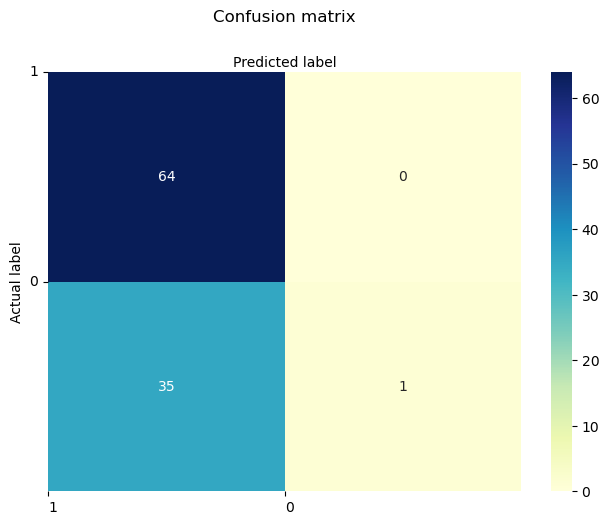

In [34]:
from sklearn import metrics

status_names= [1, 0]

#Fungsi untuk menghitung confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=status_names)

#Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(status_names))
plt.xticks(tick_marks, status_names, ha="left")
plt.yticks(tick_marks, status_names, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        36
           1       0.65      1.00      0.79        64

    accuracy                           0.65       100
   macro avg       0.82      0.51      0.42       100
weighted avg       0.77      0.65      0.52       100



#### With MinMaxScaler

In [36]:
#Normalize data using MinMaxScaler 
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [37]:
#Train dataset
lg = LogisticRegression()
lg.fit(x_train, y_train)

y_pred = lg.predict(x_test)

In [38]:
#Comparing the true labels vs predicted labels
compare = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
display(compare)

,y_true,y_pred
566,1,1
88,1,1
282,1,1
213,1,1
288,1,1
...,...,...
300,0,0
475,1,1
22,0,0
398,1,1


Text(0.5, 427.9555555555555, 'Predicted label')

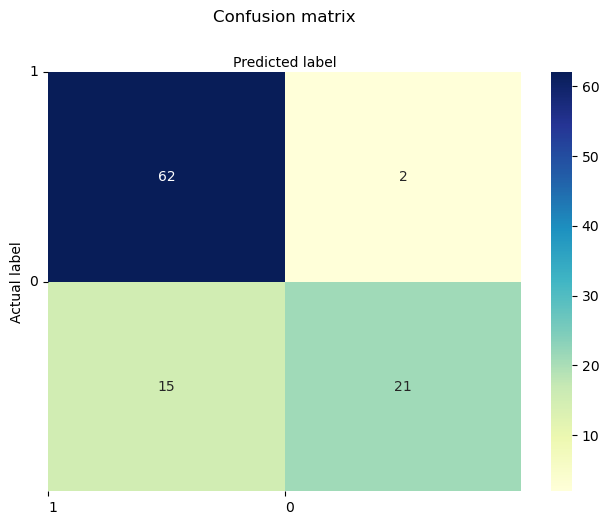

In [39]:
from sklearn import metrics

status_names= [1, 0]

#Fungsi untuk menghitung confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=status_names)

#Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(status_names))
plt.xticks(tick_marks, status_names, ha="left")
plt.yticks(tick_marks, status_names, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71        36
           1       0.81      0.97      0.88        64

    accuracy                           0.83       100
   macro avg       0.86      0.78      0.80       100
weighted avg       0.84      0.83      0.82       100



## Data Prediction

In [41]:
#Data to predict
x_data = x_test[-1:]
x_data

array([[0.20452207, 0.        , 0.25333333, 0.59459459, 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ]])

In [42]:
#Prediction Result
prediction = lg.predict(x_data)
prediction

array([0], dtype=uint8)

In [43]:
#Actual Result
y_test[-1:]

408    0
Name: Status_Y, dtype: uint8

## Kesimpulan

Mengunakan **model multivariate regression untuk dataset ini tidak cocok** untuk melakukan prediksi terhadap jumlah utang seseorang tetapi **dengan menggunakan logistic regression** kita mendapat memprediksikan status utang seseorang dengan **nilai akurasi 83%.** Jadi **model prediksi kami sudah cukup bagus** digunakan untuk **memprediksikan status utang seseorang.**

**Github: https://github.com/g-acey/Loan-Prediction**

## Komitmen Integritas

“Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan maupun
menerima bantuan apapun—baik lisan, tulisan, maupun elektronik—di dalam ujian ini selain
daripada apa yang telah diizinkan oleh pengajar, dan tidak akan menyebarkan baik soal
maupun jawaban ujian kepada pihak lain.”

**Signed by:**
* Grace Theofie (212100120)
* Justin Nathaniel Budijanto (212100391)
* Wira Yudha Tandungan (202000536)